# Résolution Numérique de l'Équation de Burgers

## 1. Calcul de la solution du problème d'évolution

Nous allons calculer la solution (évenuellement discontinue mais admissible au sens de Lax) du problème d'évolution

$$
    \begin{align*}
        \partial_t + \partial_x(u^2 / 2) &= 0 &&\forall x \in ]-1, 2[, &&\forall t \in ]0, T[, \\
        u(-1, t) &= 1 && &&\forall t \in ]0, T[, \\
        u(x, 0) &= u_0(x) &&\forall x \in ]-1, 2[.
    \end{align*}
$$

où ma condition initiale est de la forme

$$
    u_0(x) =
        \begin{cases}
            1 &\text{si }x < 0 \\
            1-x &\text{si }0 \leqslant x \leqslant 1 \\
            0 &\text{si }x > 1
        \end{cases}
$$

On appelle cette équation une équation de **Burgers sans viscosité**.  
C'est une EDP hyperbolique non linéaire : en temps fini, une solution (faible) peut développer des discontinuités, même en partant de données initiales régulières.

### Méthode des caractéristiques

L'équation caractéristique est
$\quad\begin{cases}
    x'(t) = u(x(t), t) &&\quad t>0 \\
    x(0)  = x_0
\end{cases}$

Si $x(t)$ et $u(x, t) \left(\in C^1\right)$ sont solutions, alors

$$
    \begin{align*}
        \frac{\mathrm{d}}{\mathrm{d}t}\left[u(x(t), t)\right] &= u_t(x(t), t) + x'(t)u_x(x(t), t) \\
                                                              &= u_t(x(t), t) + u(x(t), t)u_x(x(t), t) = 0
    \end{align*}
$$

i.e. $u$ est constant le long de la courbe caractéristique $x(t)$ et ainsi

$$
    u(x(t), t) = u(x(0), 0) = u_0(x_0),
$$

ce qui mène à la conclusion que les courbes caractéristiques sont des droites déterminées par la donnée initiale :

$$
    x(t) = x_0 + u_0(x_0)t. \tag{1}
$$

D'après les conditions initiales

$$
    u_0(x_0) =
        \begin{cases}
            1 &\text{si }x_0 < 0 \\
            1-x_0 &\text{si }0 \leqslant x_0 \leqslant 1 \\
            0 &\text{si }x_0 > 1
        \end{cases}
$$

et donc

$$
    x(t) =
        \begin{cases}
            x_0 + t &\text{si }x_0 < 0 \\
            (1-t)x_0 + t &\text{si }0 \leqslant x_0 \leqslant 1 \\
            x_0 &\text{si }x_0 > 1
        \end{cases}
$$

ainsi

$$
    x =
        \begin{cases}
            x_0 + t &\text{si }x < t \\
            (1-t)x_0 + t &\text{si }t \leqslant x \leqslant 1 \\
            x_0 &\text{si }x > 1
        \end{cases}
$$

et

$$
    x'(t) =
        \begin{cases}
            1 &\text{si }x < t \\
            1-x_0 &\text{si }t \leqslant x \leqslant 1 \\
            0 &\text{si }x > 1
        \end{cases}
$$

puis

$$
    u(x, t) =
        \begin{cases}
            1 &\text{si }x < t \\
            1-x_0 &\text{si }t \leqslant x \leqslant 1 \\
            0 &\text{si }x > 1
        \end{cases}
$$

Or $x_0 = x - u_0(x_0)t = x - u(x, t)t$ et donc, si $t \leqslant x \leqslant 1$,

$$
    \begin{align*}
        u(x, t) &= 1 - x_0 \\
                &= 1 - x + u(x, t)t \\
                &= \frac{1 - x}{1 - t}
    \end{align*}
$$

et donc

$$
    \boxed{u(x, t) =
        \begin{cases}
            1 &\text{si }x \leqslant t \\
            \frac{1 - x}{1 - t} &\text{si }t < x \leqslant 1 \\
            0 &\text{si }x > 1
        \end{cases}} \tag{2}
$$

### Temps de rupture

Afin de déterminer le temps de rupture, considérons deux caractéristiques répondant aux conditions initiales $x_1$ et $x2_ = x_1 + \Delta x$. D'après (1), ces caractéristiques se croiseront lorsque

$$
    x_1 + u_0(x_1)t = x_2 + u_0(x_2)t
$$

Et donc,

$$
    t = \frac{x_2 - x_1}{u_0(x_1) - u_0(x_2)} = \frac{\Delta x}{u_0(x_1) - u_0(x_1 + \Delta x)}
$$

Quand $\Delta x \to 0$, le temps converge vers $t = -\frac{1}{u_0'(x_1)}$. Pour trouver le temps de rupture $t_B$ nous cherchons le minimum (positif) de $t$,

$$
    t_b = \min_{x \in \mathbb{R}} \left[-\frac{1}{u_0'(x_1)}\right]
$$

Or

$$
    u_0'(x_1) =
        \begin{cases}
            0 &\text{si }x_1 < 0 \\
            1 &\text{si }0 \leqslant x_1 \leqslant 1 \\
            0 &\text{si }x_1 > 1
        \end{cases}
$$

Donc $T_B = 1$.

Bien que la solution (2) obtenue par la méthode des caractéristiques semble valide pour $t < t_B$, il est clair qu'elle ne peut pas être acceptée pour $t > t_B$.

### Théorie des distributions

Pour un système d'équations hyperbolique écrit sous la forme

$$
    \frac{\partial u}{\partial t} + \frac{\partial g(u)}{\partial x} = 0
$$

la vitesse de propagation d'un choc est donné par l'équation de Rankine-Hugoniot

$$
    c = \frac{\Delta g}{\Delta u}
$$

Dans notre cas $\displaystyle \frac{u^2}{2}$, d'où

$$
    c = \frac{\displaystyle\frac{u_G^2}{2} - \frac{u_D^2}{2}}{u_G - u_{D}} = \frac{u_G + u_D}{2}
$$

où $u_G$ et $u_D$ sont les vitesses de part et d'autre du choc. Si on suit la méthode des caractéristiques, la valeur candidate pour la solution $u$ est donnée par

$$
    u(x, t) = u_0(x_0).
$$

Comme la fonction $\mathbb{R} \ni y \mapsto u_0(y) \in \mathbb{R}$ est constante pour $y < 1$ et pour $y > 1$, on a comme valeur candidate $u_G = 1$ à gauche de la discontinuité et $u_D = 0$ à droite de celle-ci. L'équation de discontinuité $x = X(t)$ s'écrit dans notre cas particulier :

$$
    \frac{\mathrm{d}X}{\mathrm{d}t} = \frac{1}{2}, \qquad X(1) = 1
$$

et cette relation siintègre sans difficulté :

$$
    X(t) = \frac{t + 1}{2}.
$$

La solution discontinue mais admissible au sens de Lax du problème est donc

- si $t < 1$
  $$
      \begin{cases}
              1 &\text{si }x \leqslant t \\
              \frac{1 - x}{1 - t} &\text{si }t < x \leqslant 1 \\
              0 &\text{si }x > 1
          \end{cases}
  $$
- si $t \geqslant 1$
  $$
      \begin{cases}
              1 &\text{si }x \leqslant \frac{t + 1}{2} \\
              0 &\text{si }x > \frac{t + 1}{2}
          \end{cases}
  $$


## 2. Schéma de Rusanov

Le schéma de Rusanov pour une EDP de la forme $\partial_tu + \partial_x(f(u)) = 0$ s'écrit :

$$
    u^{n+1}_i = u^n_i - \frac{\Delta t}{\Delta x} \left(\mathcal{F}\left(u^n_i, u^n_{i+1}, \lambda\right) - \mathcal{F}\left(u^n_{i-1}, u^n_i, \lambda\right)\right)
$$

où le flux numérique $\mathcal{F}\left(u_L, u_R, \lambda\right)$ est donné par

$$
    \mathcal{F}\left(u_L, u_R, \lambda\right) = \frac{f(u_L) + f(u_R)}{2} - \frac{\lambda}{2}(u_R - u_L)
$$

avec

$$
    \lambda = \max_i \left|\frac{\partial f}{\partial u}(u_i)\right| \quad \text{ et } \quad \Delta t = C \frac{\Delta x}{\lambda}
$$

où $C$ est un nombre CFL, que l'on prendra égal à 0,5.

### Programmation

In [1]:
import numpy as np  # librairie numpy
import matplotlib.pyplot as plt  # librairie matplotlib
plt.style.use('ggplot')


def exact_solution_u(x, t):
    """
    Calcule la solution exacte u(x, t) pour l'équation de Burgers.
    """
    if t < 1:
        if x <= t:
            return 1
        elif x >= 1:
            return 0
        else:
            return (1 - x) / (1 - t)

    if x <= (t + 1) / 2:
        return 1

    return 0


def flux(u):
    """
    Calcule la valeur du flux f pour l'équation de Burgers.
    """
    return u * u / 2


def dflux(u):
    """
    Calcule la valeur de df/du pour l'équation de Burgers.
    """
    return u



def numerical_flux(uL, uR, Lambda):
    """
    Calcule le flux numérique pour le schéma de Rusanov appliqué à l'équation de Burgers.
    """
    f = (flux(uL) + flux(uR)) / 2
    return f - Lambda * (uR - uL) / 2


def rusanov_scheme(xmin, xmax, N, CFL, tmax):
    """
    Calcule une solution approchée pour t = tmax en utilisant le schéma de Rusanov pour l'équation de Burgers.
    """
    dx = (xmax - xmin) / N
    v = np.zeros(N + 2)
    t = 0

    xi = np.linspace(xmin + dx / 2, xmax - dx / 2, N + 2)
    u = [exact_solution_u(x, t) for x in xi]

    while t < tmax:
        Lambda = max(abs(dflux(e)) for e in u)
        dt = CFL * dx / Lambda
        t += dt

        for i in range(1, N + 1):
            v[i] = u[i]
            v[i] -= dt / dx * numerical_flux(u[i], u[i + 1], Lambda)
            v[i] += dt / dx * numerical_flux(u[i - 1], u[i], Lambda)

        v[0] = exact_solution_u(xi[0], t)
        v[-1] = v[-2]
        u = np.copy(v)

    return u, xi

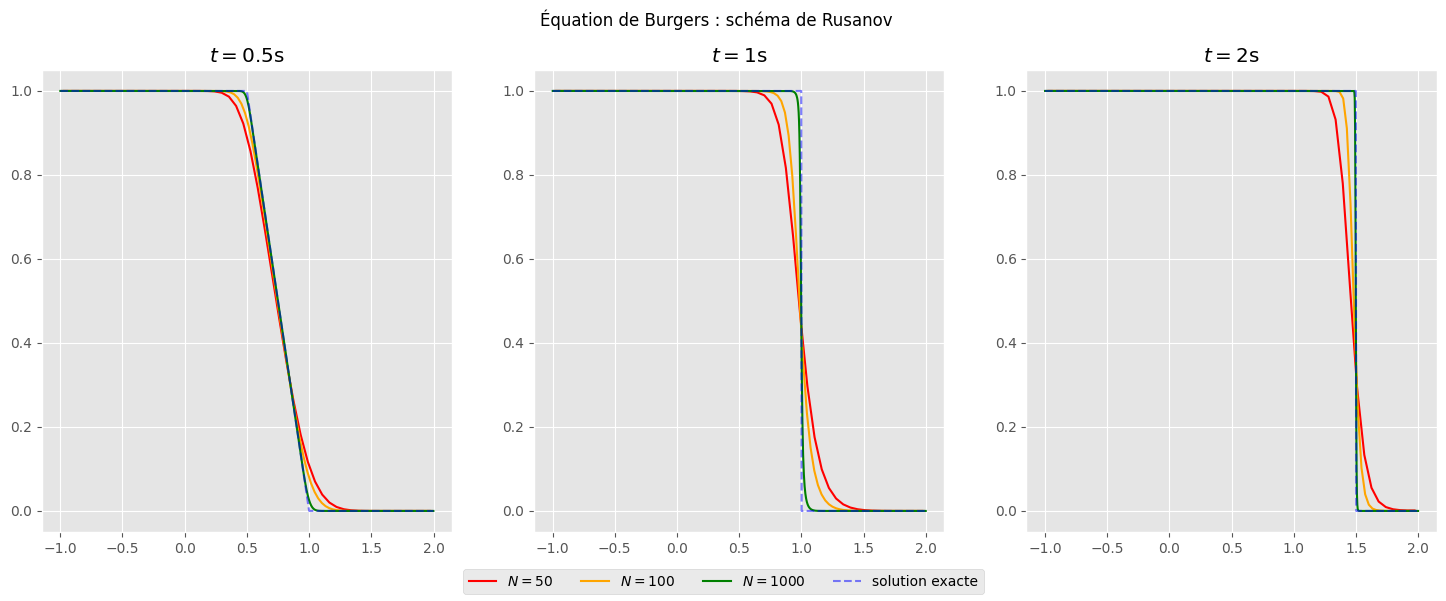

In [2]:
# Paramètres généraux
xmin = -1
xmax = 2
CFL = 0.5

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

all_times = [0.5, 1, 2]
all_N = [50, 100, 1000]
colors = ['r', 'orange', 'g']

for i_t, end_time in enumerate(all_times):
    ax[i_t].set_title("$t = ${0}s".format(end_time))

    dx = (xmax - xmin) / 1000
    xi = np.linspace(xmin + dx / 2, xmax - dx / 2, 1000 + 2)
    exact_solution = [exact_solution_u(x, end_time) for x in xi]

    for i_N, N in enumerate(all_N):
        u, xi = rusanov_scheme(xmin, xmax, N, CFL, end_time)
        ax[i_t].plot(xi, u, colors[i_N], label="$N = ${0}".format(N))

    ax[i_t].plot(xi, exact_solution, 'b--', label="solution exacte", alpha=0.5)

fig.suptitle('Équation de Burgers : schéma de Rusanov')
handles, labels = ax[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4)
plt.show()

La convergence du schéma de Rusanov dépend du nombre de points de discrétisations.  
On voit bien sur les graphiques que plus $N$ augmente, plus la solution numérique se rapproche de la solution exacte.

## 3. Schéma aux différences finies

Programmons le schéma aux différences finies suivant :
$$
    \frac{u^{n+1}_i - u^n_i}{\Delta t} + u^n_{i-1}\frac{u^n_i - u^n_{i-1}}{\Delta x} = 0.
$$

In [3]:
def initial_condition_u(x):
    """
    Calcule la condition initiale u(x) pour l'équation de Burgers.
    """
    if x < 0:
        return 1
    if x > 1:
        return 0
    return 1 - x


def u_BC():
    # retourne la valeur de la condition aux limites à gauche pour l'équation de Burgers
    return 1


def compute_time_step(u, dx, time, end_time):
    """
    Calcule le pas de temps pour le schéma aux différences finies.
    """
    dt = dx / (2 * np.max(np.abs(u)))

    if time + dt > end_time:
        dt = end_time - time

    return dt


def finite_difference_update(u, dx, dt):
    """
    Effectue la mise à jour en temps du vecteur u par le schéma aux différences finies.
    """
    v = np.zeros_like(u)

    for i in range(1, len(u)):
        v[i] = u[i] - dt / dx * u[i - 1] * (u[i] - u[i - 1])
        v[0] = u_BC()

    return v

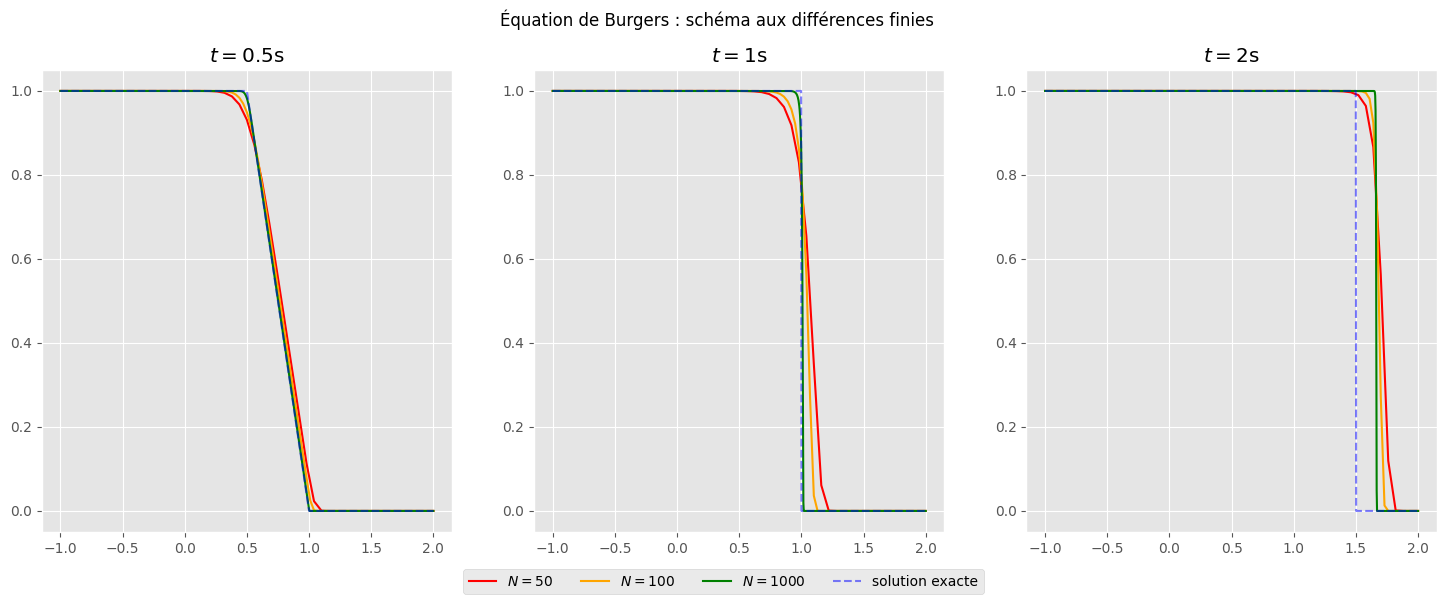

In [4]:
# Paramètres généraux
xmin = -1
xmax = 2

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

all_times = [0.5, 1, 2]
all_N = [50, 100, 1000]

for i_t, end_time in enumerate(all_times):
    for i_N, N in enumerate(all_N):
        x = np.linspace(xmin, xmax, N + 1)
        dx = (xmax - xmin) / N
        u = [initial_condition_u(e) for e in x]
        time = 0  # temps initial

        while time < end_time:
            dt = compute_time_step(u, dx, time, end_time)
            u = finite_difference_update(u, dx, dt)
            time += dt

        ax[i_t].plot(x, u, colors[i_N], label="$N = ${0}".format(N))

    ax[i_t].set_title("$t = ${0}s".format(end_time))
    exact_x = np.linspace(xmin, xmax, 1001)
    exact_solution = [exact_solution_u(e, end_time) for e in exact_x]

    ax[i_t].plot(exact_x, exact_solution, 'b--',
                 label="solution exacte", alpha=0.5)

fig.suptitle('Équation de Burgers : schéma aux différences finies')
handles, labels = ax[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4)
plt.show()

Pour ce schéma aux différences finies, la convergence semble augmenter avec le nombre de points de discrétisation N et diminuer avec le temps $t$.  
À $t = 2$s, on voit nettement que la solution approchée avec ce schéma est décalée à droite de la solution exacte. On lui préfèrera donc le schéma de Rusanov lorsque t dépasse une certaine valeur.  
Par contre, lorsque $N$ et $t$ sont petits, ce schéma obtient des solutions plus proches que celles obtenues avec le schéma de Rusanov.

## 4. Trafic automobile

On considère maintenant l'équation du trafic automobile

$$
    \partial_t \rho + \partial_x f(\rho) = 0,
$$

avec (unité de distance en kilomètre, unité de temps en heure)

$$
    f(\rho) = \rho v_0(1- \rho/\rho_b) \qquad v_0 = 130, \; \rho_b = 200.
$$

On considère un bouchon (\rho = \rhob) sur un tronçon d'autoroute de longueur $L = 1$ km. À $t = 0$ l'obstacle sur l'autoroute est enlevé. Programmons le schéma de Rusanov pour résoudre ce problème.

$$
    \begin{cases}
        \partial_t\rho + \partial_x(f(\rho)) = 0 &&x \in ]0,L[, &&t \in ]0, T[ \\
        \rho(0, t) = 0 && &&t \in ]0, T[ \\
        \rho(x, 0) = \rho_0(x) &&x \in]0,L[ \\
    \end{cases}
$$

où $\rho \in [0, \rho_b]$ représente la densité de voitures sur une route, $\rho_b$ étant la densité maximale de voitures supportée par la route.

- Lorsque $\rho = \rho_b$, on a un bouchon et le trafic est à l’arrêt.
- À l'inverse, si $\rho = 0$, il n'y a aucune voiture sur la route.

Pour modéliser ce phénomène, la fonction f, représentant le flux de voitures sur la route, est donnée par
$$
    f(\rho) = \rho v_0\left(1 - \frac{\rho}{\rho_b}\right)
$$
où $v_0$ est la vitesse maximale autorisée sur la route.

- Si $\rho = \rho_b$, on a bien $f(\rho_b) = 0$ : quand la densité maximale de voitures est atteinte le flux est nul, et donc la circulation est arrêtée.
- À l'inverse, si $\rho = 0$, on a $f(0) = 0$ : quand la densité de voitures est nulle, le flux est nul puisqu’il n’y a aucune voiture sur la route.

La condition initiale sera :
$$
    \rho_0(x) =
        \begin{cases}
            0      && \text{si } x < 0, \\
            \rho_b && \text{si } 0 \leqslant x \leqslant 1, \\
            0      && \text{si } x > 1.
        \end{cases}
$$
qui correspond à un bouchon d'un kilomètre sans aucune circulation en amont ni en aval.

### Programmation

In [5]:
# Paramètres généraux
rho_b = 200
v_0 = 130

def initial_condition(x):
    # Retourne la condition initiale en fonction de x pour l'équation du trafic automobile
    if 0 <= x <= 1:
        return rho_b
    return 0

def boundary_condition():
    # Retourne la valeur de la condition aux limites à gauche pour l'équation du trafic automobile
    return 0

def traffic_flux(rho):
    # Retourne la valeur de f pour l'équation du trafic automobile
    return rho * v_0 * (1 - rho / rho_b)

def derivative_traffic_flux(rho):
    # Retourne la valeur de df/du pour l'équation du trafic automobile
    return v_0 - 2 * rho / rho_b

def numerical_traffic_flux(rhoL, rhoR, Lambda):
    # Calcule le flux numérique pour le schéma de Rusanov appliqué à l'équation du trafic automobile
    f = (traffic_flux(rhoL) + traffic_flux(rhoR)) / 2
    return f - Lambda * (rhoR - rhoL) / 2

def rusanov_traffic(xmin, xmax, N, CFL, time_list):
    dx = (xmax - xmin) / N
    k = len(time_list)
    v = np.zeros(N + 2)
    t = 0

    xi = [xmin + dx * (i - 0.5) for i in range(N + 2)]
    rho = [initial_condition(x) for x in xi]
    rhos = []

    for j in range(k):
        while t < time_list[j]:
            Lambda = 0

            for r in rho:
                Lambda = max(Lambda, abs(derivative_traffic_flux(r)))

            dt = CFL * dx / Lambda
            t += dt

            for i in range(1, N + 1):
                v[i] = rho[i]
                v[i] -= dt / dx * numerical_traffic_flux(rho[i], rho[i+1], Lambda)
                v[i] += dt / dx * numerical_traffic_flux(rho[i-1], rho[i], Lambda)

            v[0] = boundary_condition()
            v[-1] = v[-2]
            rho = np.copy(v)
        rhos.append(rho)

    return rhos, xi

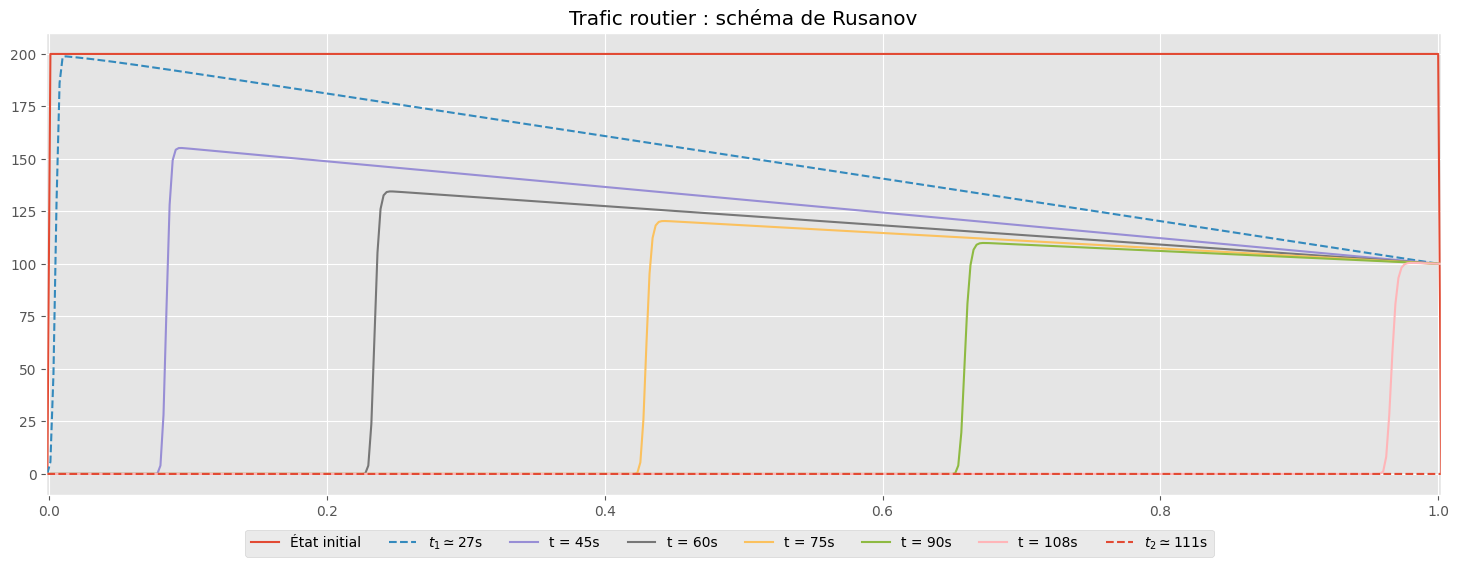

In [6]:
# Paramètres
xmin = 0
xmax = 1.1
CFL = 0.8
N = 500
end_time_seconds = [0, 27, 45, 60, 75, 90, 108, 111]
end_time_hours = np.array(end_time_seconds) / 3600

# Calcul et affichage
fig, ax = plt.subplots(figsize=(18, 6))
rhos, xi = rusanov_traffic(xmin, xmax, N, CFL, end_time_hours)

for i in range(len(end_time_hours)):
    if i == 0:
        ax.plot(xi, rhos[i], label="État initial")
    elif i == 1:
        ax.plot(xi, rhos[i], '--', label="$t_1 \simeq ${0}s".format(end_time_seconds[i]))
    elif i == 7:
        ax.plot(xi, rhos[i], '--', label="$t_2 \simeq ${0}s".format(end_time_seconds[i]))
    else:
        ax.plot(xi, rhos[i], label="t = {0}s".format(end_time_seconds[i]))

plt.title('Trafic routier : schéma de Rusanov')
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-1/N, 1 + 1/N)
fig.legend(handles, labels, loc='lower center', ncol=8)
plt.show()

Modifions la fonction `rusanov_routier` pour déterminer :
- l'instant $t_1$ à partir duquel le trafic n’est plus bloqué nulle part $\left(\text{i.e. }\forall x \in [0, 1], \rho(x, t_1) < \rho_b\right)$,
- l’instant $t_2$ à partir duquel le trafic est fluide partout $\left(\text{i.e. }\forall x \in [0, 1], \rho(x, t_2) = 0\right)$.

In [7]:
def find_transition_times(xmin, xmax, N, CFL, rho_b, xend):
    dx = (xmax - xmin) / N
    i_end = int((xend - xmin) / dx)

    v = np.zeros(N + 2)
    t = 0
    t1 = 0

    xi = [xmin + dx * (i - 0.5) for i in range(N + 2)]
    rho = [initial_condition(x) for x in xi]

    while (rho[i_end] + rho[i_end + 1]) / 2 > 1e-10:
        Lambda = 0

        for r in rho:
            Lambda = max(Lambda, abs(derivative_traffic_flux(r)))

        dt = CFL * dx / Lambda
        t += dt

        if t1 == 0 and np.max(rho) <= 199:
            t1 = t

        for i in range(1, N + 1):
            v[i] = rho[i]
            v[i] -= dt / dx * numerical_traffic_flux(rho[i], rho[i+1], Lambda)
            v[i] += dt / dx * numerical_traffic_flux(rho[i-1], rho[i], Lambda)

        v[0] = boundary_condition()
        v[-1] = v[-2]
        rho = np.copy(v)

    return t1, t

In [8]:
N = 500
t1, t2 = find_transition_times(xmin, xmax, N, CFL, rho_b, 1)
s1 = t1 * 3600
s2 = t2 * 3600

print(r"Le trafic n'est plus saturé à $t_1$ = {0:0.3f}s".format(s1))
print(r"Le trafic redevient fluide à $t_2$ = {0:0.3f}s".format(s2))

Le trafic n'est plus saturé à $t_1$ = 27.001s
Le trafic redevient fluide à $t_2$ = 110.977s


- Le trafic n'est plus saturé à $t_1 \simeq $ 27s.
- Le trafic redevient fluide à $t_2 \simeq $ 111s.